In [5]:
%load_ext autoreload
%matplotlib inline
%autoreload 2
import numpy, imageio, elasticdeform
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import sys

import gryds
import scipy

In [182]:
original_image = plt.imread('pikaqiu.jpg')[:, :, 0]
image = original_image.copy()
# image[10::20] = 1
# image[11::20] = 1
# image[:, 10::20] = 1
# image[:, 11::20] = 1

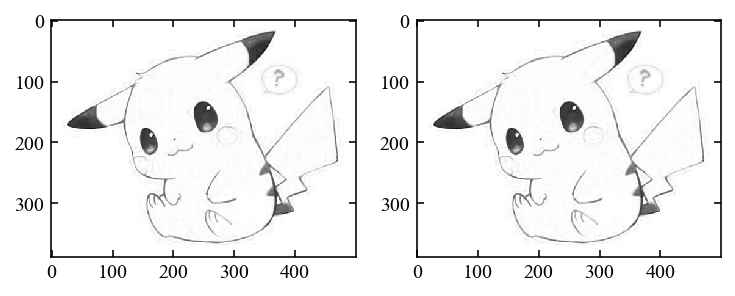

In [183]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(original_image)
ax[1].imshow(image)
plt.show()
# fig.show()

In [210]:
# 执行一个变换，让图像相左移动 50%，即让 *所有的列* 全部减去 *图像宽度* 的50% :
a_translation = gryds.TranslationTransformation([0., 0.1]) # [行，列]

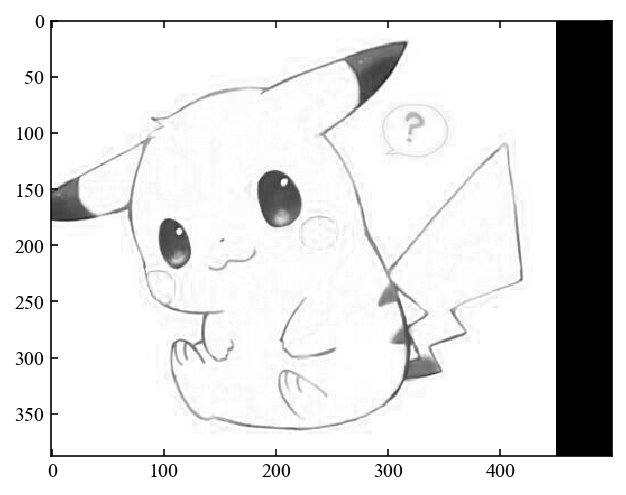

In [211]:
interpolator = gryds.Interpolator(image) # 生成一个图像的插值对象
translated_image = interpolator.transform(a_translation) # 对这个插值对象应用一个变换
plt.imshow(translated_image);

In [63]:
# 通过网格变换实现上相同描述变换
an_image_grid = gryds.Grid(image.shape)  # makes a Grid the size of the image
translated_image_grid = an_image_grid.transform(a_translation)
translated_image_grid.grid

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.00257732, 0.00257732, 0.00257732, ..., 0.00257732,
         0.00257732, 0.00257732],
        [0.00515464, 0.00515464, 0.00515464, ..., 0.00515464,
         0.00515464, 0.00515464],
        ...,
        [0.992268  , 0.992268  , 0.992268  , ..., 0.992268  ,
         0.992268  , 0.992268  ],
        [0.9948454 , 0.9948454 , 0.9948454 , ..., 0.9948454 ,
         0.9948454 , 0.9948454 ],
        [0.9974227 , 0.9974227 , 0.9974227 , ..., 0.9974227 ,
         0.9974227 , 0.9974227 ]],

       [[0.5       , 0.502     , 0.504     , ..., 1.494     ,
         1.496     , 1.498     ],
        [0.5       , 0.502     , 0.504     , ..., 1.494     ,
         1.496     , 1.498     ],
        [0.5       , 0.502     , 0.504     , ..., 1.494     ,
         1.496     , 1.498     ],
        ...,
        [0.5       , 0.502     , 0.504     , ..., 1.494     ,
         1.496     , 1.498     ],
        [0.5

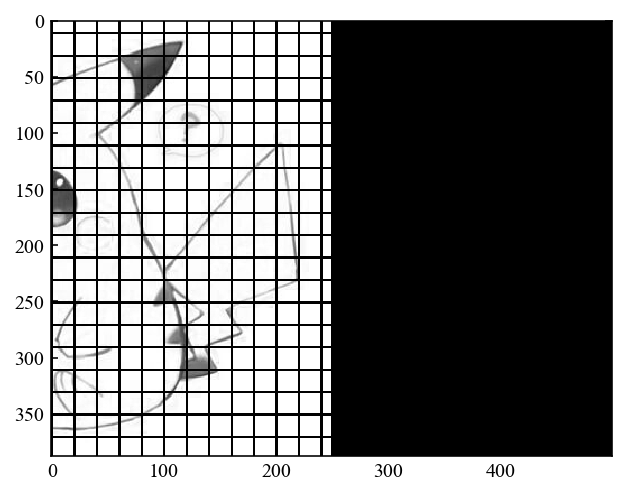

In [62]:
a_translated_image = interpolator.resample(translated_image_grid)
plt.imshow(a_translated_image);

In [155]:
sp_shape = (3,3)
image_grid = gryds.Grid(sp_shape).grid
image_grid[0,...], image_grid[1,...]

(array([[0.        , 0.        , 0.        ],
        [0.33333334, 0.33333334, 0.33333334],
        [0.6666667 , 0.6666667 , 0.6666667 ]], dtype=float32),
 array([[0.        , 0.33333334, 0.6666667 ],
        [0.        , 0.33333334, 0.6666667 ],
        [0.        , 0.33333334, 0.6666667 ]], dtype=float32))

C:\Miniconda\envs\tf2\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



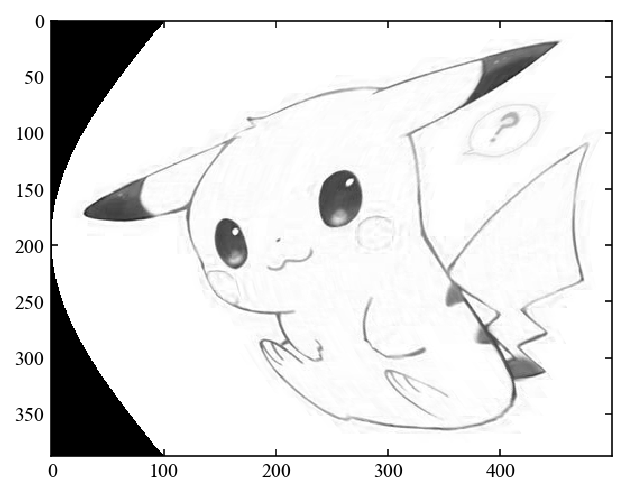

In [206]:
sp_shape = (50,50)
x = np.linspace(0, np.pi, sp_shape[0])
a_bspline_transformation = gryds.BSplineTransformation(np.meshgrid(np.zeros(5),sin(x)/5-0.2))
interpolator = gryds.Interpolator(image)
a_translated_image=interpolator.transform(a_bspline_transformation)

fig2 = plt.figure()
plt.imshow(a_translated_image)
fig2.show()

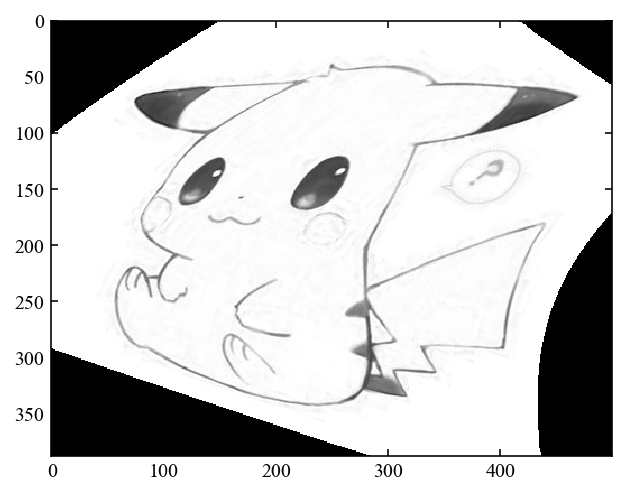

In [212]:
# 在上面变换的基础上再进行一些变换，如选择
a_rotation = gryds.AffineTransformation(
    ndim=2,
    angles=[np.pi/6.], # List of angles (for 3D transformations you need a list of 3 angles).
    center=[0.5, 0.5]  # Center of rotation.
)

composed = gryds.ComposedTransformation(a_bspline_transformation, a_rotation, a_translation)
twice_transformed_image = interpolator.transform(composed)
plt.imshow(twice_transformed_image);